Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1) Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
import wrangle as w

train, validate, test = w.wrangle_zillow()

In [3]:
#Splitting the train, validate, test sets into their respective columns to be scaled and their target variable.

cols = ['bedrooms', 'bathrooms', 'sqft', 'yearbuilt', 'taxamount']

X_train = train[cols]
y_train = train.value

X_validate = validate[cols]
y_validate = validate.value

X_test = test[cols]
y_test = test.value

In [4]:
#Making the models.

mm_scaler = sklearn.preprocessing.MinMaxScaler()
r_scaler = sklearn.preprocessing.RobustScaler()
s_scaler = sklearn.preprocessing.StandardScaler()

In [5]:
#Fitting the models. Note that since we're only scaling, we only put in X_train during the fit. 
#Don't put in your y_train. Your validate and test sets would be transformed using the scaler you fit with X_train.

mm_scaler.fit(X_train)
r_scaler.fit(X_train)
s_scaler.fit(X_train)

StandardScaler()

In [6]:
X_train_mmscaled = mm_scaler.transform(X_train)
X_train_rscaled = r_scaler.transform(X_train)
X_train_sscaled = s_scaler.transform(X_train)

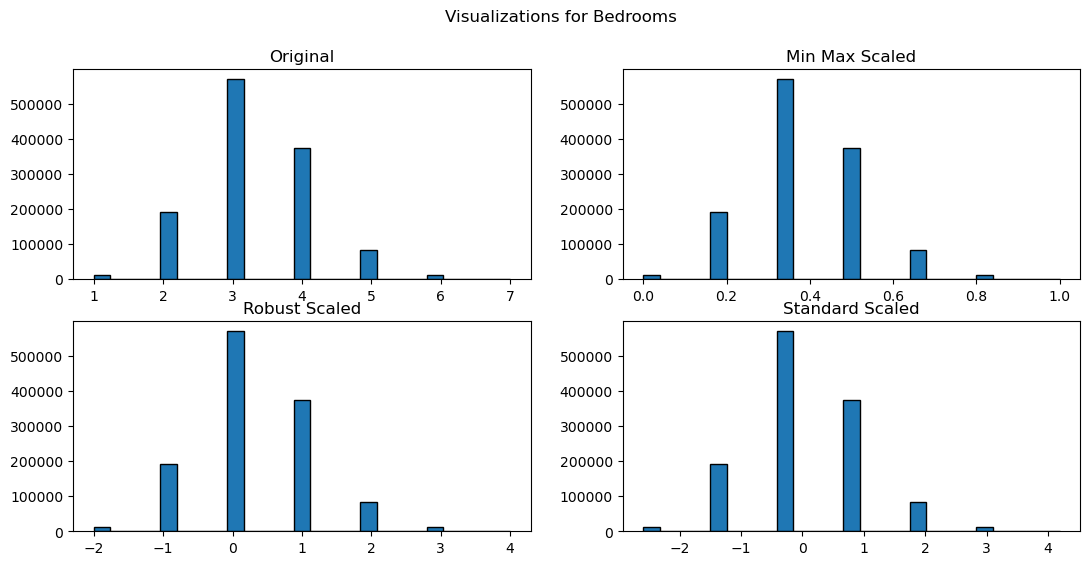

In [7]:
#For bedrooms

plt.figure(figsize=(13, 6))
plt.suptitle('Visualizations for Bedrooms')
plt.subplot(221)
plt.hist(X_train['bedrooms'], bins=25, ec='black')
plt.title('Original')
plt.subplot(222)
plt.hist(X_train_mmscaled[:,0], bins=25, ec='black')
plt.title('Min Max Scaled')
plt.subplot(223)
plt.hist(X_train_rscaled[:,0], bins=25, ec='black')
plt.title('Robust Scaled')
plt.subplot(224)
plt.hist(X_train_sscaled[:,0], bins=25, ec='black')
plt.title('Standard Scaled')
plt.show()

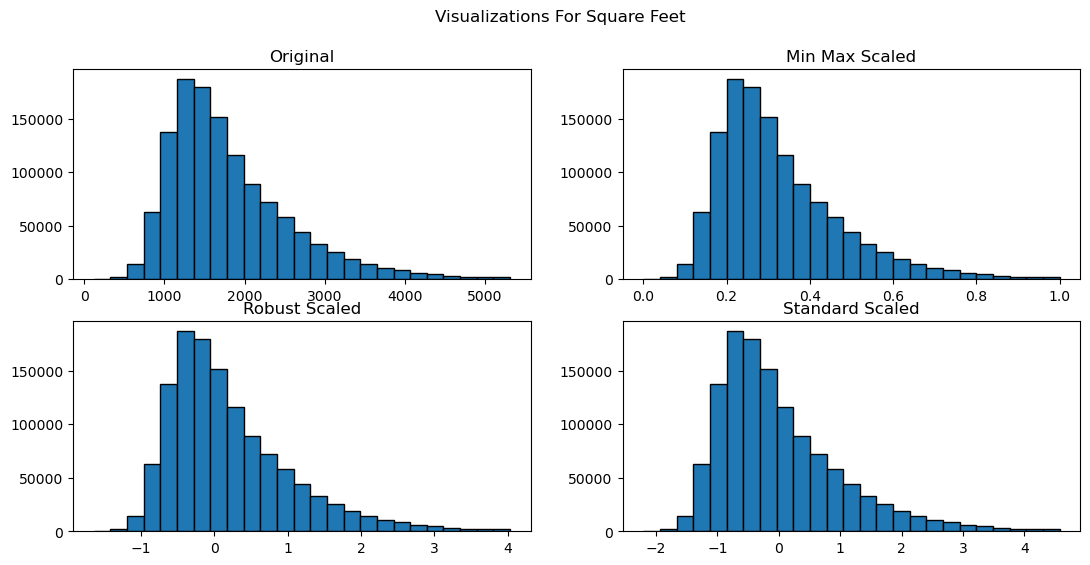

In [8]:
#For sqft

plt.figure(figsize=(13, 6))
plt.suptitle('Visualizations For Square Feet')
plt.subplot(221)
plt.hist(X_train['sqft'], bins=25, ec='black')
plt.title('Original')
plt.subplot(222)
plt.hist(X_train_mmscaled[:,2], bins=25, ec='black')
plt.title('Min Max Scaled')
plt.subplot(223)
plt.hist(X_train_rscaled[:,2], bins=25, ec='black')
plt.title('Robust Scaled')
plt.subplot(224)
plt.hist(X_train_sscaled[:,2], bins=25, ec='black')
plt.title('Standard Scaled')
plt.show()

2) Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [9]:
X_train.head()

,bedrooms,bathrooms,sqft,yearbuilt,taxamount
211116,4,3.0,3073,1980,4691
1901038,3,3.0,1616,1949,4529
1892331,6,3.0,2752,1965,7256
1961460,2,2.0,1135,1985,3176
1608216,3,2.0,1669,1923,6653


In [10]:
X_train[cols] = mm_scaler.inverse_transform(X_train_mmscaled)

X_train.head()

/var/folders/0j/dh4q6gzs5xq4fv119n901xmw0000gn/T/ipykernel_14983/211804531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols] = mm_scaler.inverse_transform(X_train_mmscaled)


,bedrooms,bathrooms,sqft,yearbuilt,taxamount
211116,4.0,3.0,3073.0,1980.0,4691.0
1901038,3.0,3.0,1616.0,1949.0,4529.0
1892331,6.0,3.0,2752.0,1965.0,7256.0
1961460,2.0,2.0,1135.0,1985.0,3176.0
1608216,3.0,2.0,1669.0,1923.0,6653.0


Yes, the data at least is the exact same as the original data, only dtype was changed to float64.

3) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [11]:
qt_scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

In [12]:
qt_scaler.fit(X_train)

QuantileTransformer(output_distribution='normal')

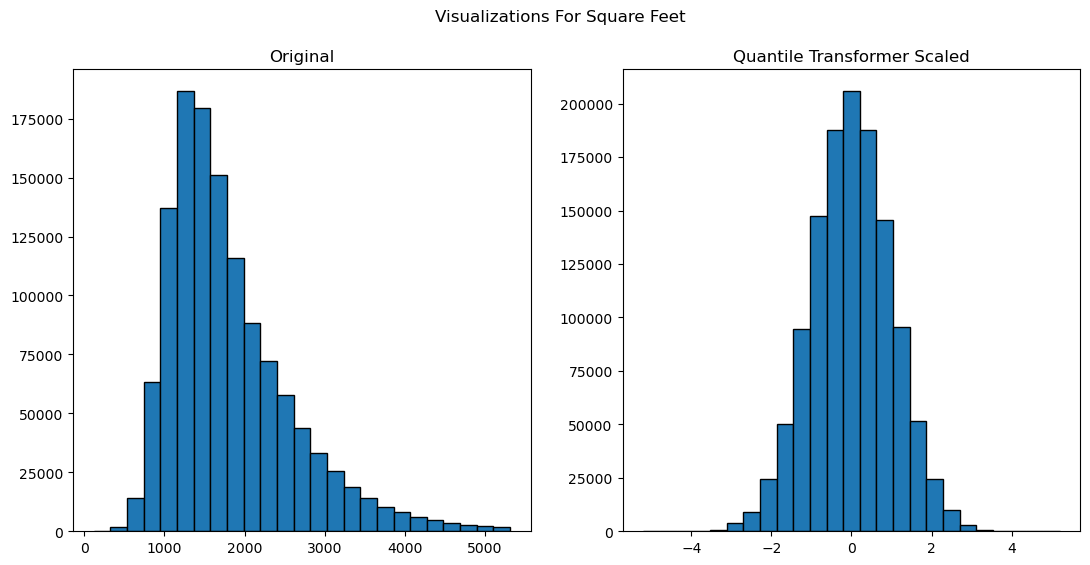

In [13]:
X_train_qtscaled = qt_scaler.transform(X_train)

plt.figure(figsize=(13, 6))
plt.suptitle('Visualizations For Square Feet')
plt.subplot(121)
plt.hist(X_train['sqft'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_qtscaled[:,2], bins=25, ec='black')
plt.title('Quantile Transformer Scaled')
plt.show()

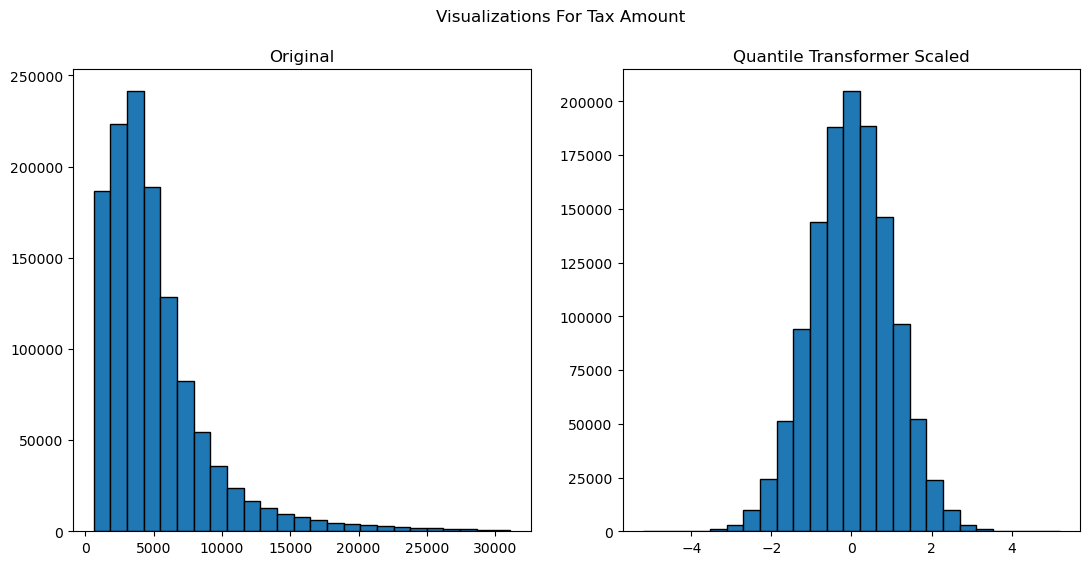

In [14]:
plt.figure(figsize=(13, 6))
plt.suptitle('Visualizations For Tax Amount')
plt.subplot(121)
plt.hist(X_train['taxamount'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_qtscaled[:,4], bins=25, ec='black')
plt.title('Quantile Transformer Scaled')
plt.show()

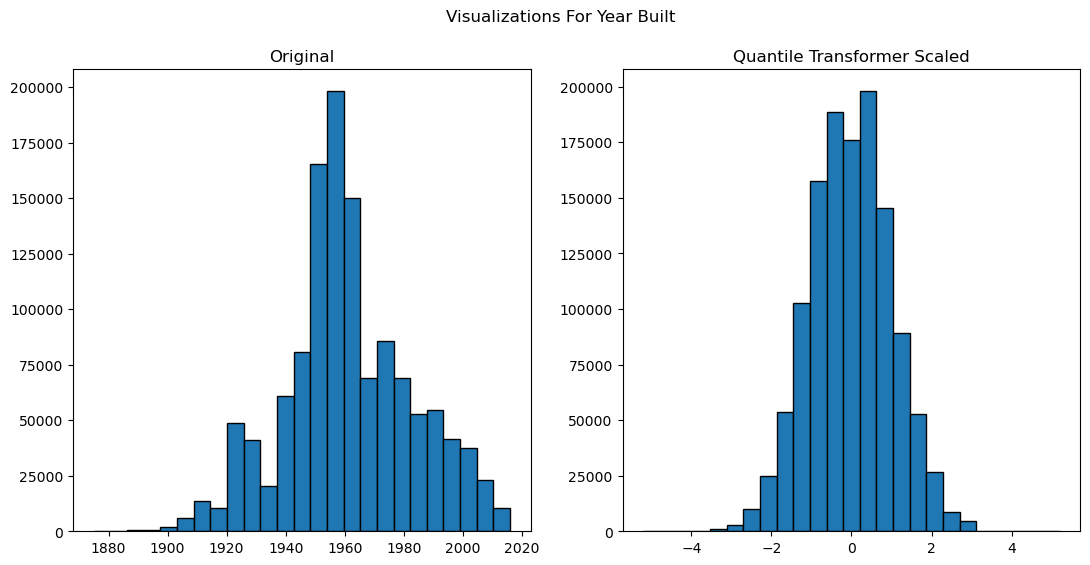

In [15]:
plt.figure(figsize=(13, 6))
plt.suptitle('Visualizations For Year Built')
plt.subplot(121)
plt.hist(X_train['yearbuilt'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_qtscaled[:,3], bins=25, ec='black')
plt.title('Quantile Transformer Scaled')
plt.show()

4) Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [16]:
qt_scaler = sklearn.preprocessing.QuantileTransformer()

In [17]:
qt_scaler.fit(X_train)

QuantileTransformer()

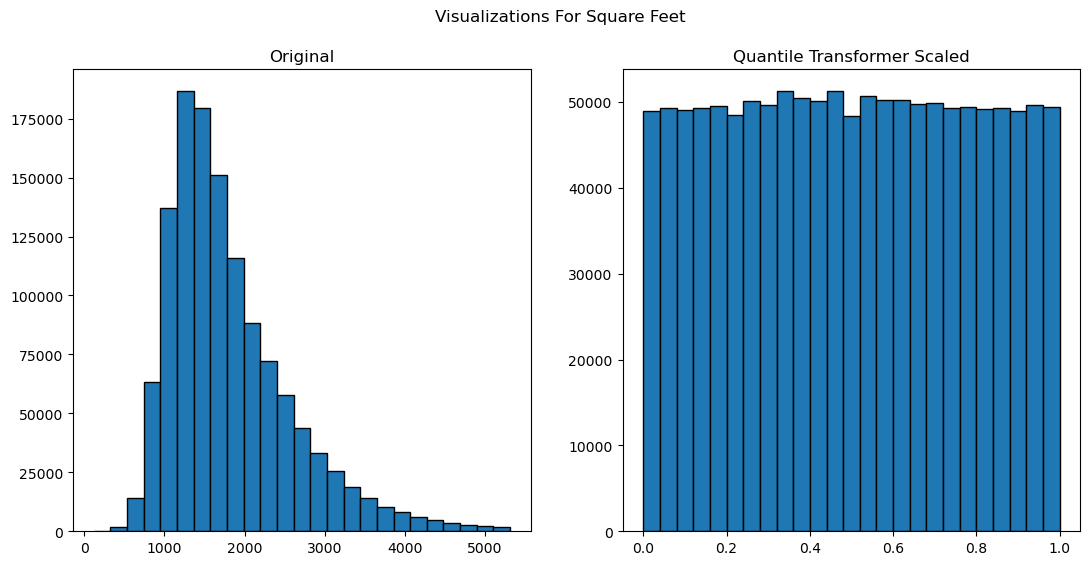

In [18]:
X_train_qtscaled = qt_scaler.transform(X_train)

plt.figure(figsize=(13, 6))
plt.suptitle('Visualizations For Square Feet')
plt.subplot(121)
plt.hist(X_train['sqft'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_qtscaled[:,2], bins=25, ec='black')
plt.title('Quantile Transformer Scaled')
plt.show()

That the distribution is now a uniform distribution.

5) Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [19]:
#Going to go with Robust since even after we snipped off the most ridiculous outliers, there are still
#plenty of them left.

#I had tried to create one on my own but the resulting DataFrame didn't include the column names back in. 
#Looked at Misty's code to see how column names were preserved.

def scale_data(train, 
               validate, 
               test, 
               cols):
    
    #make copies for scaling
    train_scaled = train.copy() #Ah, making a copy of the df and then overwriting the data in .transform()
    validate_scaled = test.copy()
    test_scaled = test.copy()

    #scale them!
    #make the thing
    scaler = sklearn.preprocessing.RobustScaler()

    #fit the thing
    scaler.fit(train[cols])

    #use the thing
    train_scaled[cols] = scaler.transform(train[cols])
    validate_scaled[cols] = scaler.transform(validate[cols])
    test_scaled[cols] = scaler.transform(test[cols])
    
    return train_scaled, validate_scaled, test_scaled

In [20]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, cols)

In [21]:
train_scaled.head()

,bedrooms,bathrooms,sqft,value,yearbuilt,taxamount,county,county_Orange,county_Ventura
211116,1.0,1.0,1.585153,367514,0.88,0.156974,LA,0,0
1901038,0.0,1.0,-0.005459,351442,-0.36,0.113355,LA,0,0
1892331,3.0,1.0,1.234716,636202,0.28,0.847604,Orange,1,0
1961460,-1.0,0.0,-0.530568,184000,1.08,-0.250942,LA,0,0
1608216,0.0,0.0,0.052402,534783,-1.40,0.685245,LA,0,0
